In [ ]:
import pandas as pd

df_california = pd.read_csv('material/california_housing_test.csv')
df_california

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


In [ ]:
# Data Overview
data_overview = df_california.describe(include='all')
unique_values = df_california.nunique()
missing_values = df_california.isnull().sum()

# Create a summary DataFrame
overview_df = pd.DataFrame({
    'Data Types': df_california.dtypes,
    'Unique Values': unique_values,
    'Missing Values': missing_values,
    'Mean': data_overview.loc['mean'],
    'Median': df_california.median(),
    'Min': data_overview.loc['min'],
    '25th Percentile': data_overview.loc['25%'],
    '50th Percentile (Median)': data_overview.loc['50%'],
    '75th Percentile': data_overview.loc['75%'],
    'Max': data_overview.loc['max']
})

# Display the overview
overview_df


,Data Types,Unique Values,Missing Values,Mean,Median,Min,25th Percentile,50th Percentile (Median),75th Percentile,Max
longitude,float64,607,0,-119.589200,-118.48500,-124.1800,-121.810,-118.48500,-118.020000,-114.4900
latitude,float64,587,0,35.635390,34.27000,32.5600,33.930,34.27000,37.690000,41.9200
housing_median_age,float64,52,0,28.845333,29.00000,1.0000,18.000,29.00000,37.000000,52.0000
total_rooms,float64,2215,0,2599.578667,2106.00000,6.0000,1401.000,2106.00000,3129.000000,30450.0000
total_bedrooms,float64,1055,0,529.950667,437.00000,2.0000,291.000,437.00000,636.000000,5419.0000
population,float64,1802,0,1402.798667,1155.00000,5.0000,780.000,1155.00000,1742.750000,11935.0000
households,float64,1026,0,489.912000,409.50000,2.0000,273.000,409.50000,597.250000,4930.0000
median_income,float64,2578,0,3.807272,3.48715,0.4999,2.544,3.48715,4.656475,15.0001
median_house_value,float64,1784,0,205846.275000,177650.00000,22500.0000,121200.000,177650.00000,263975.000000,500001.0000


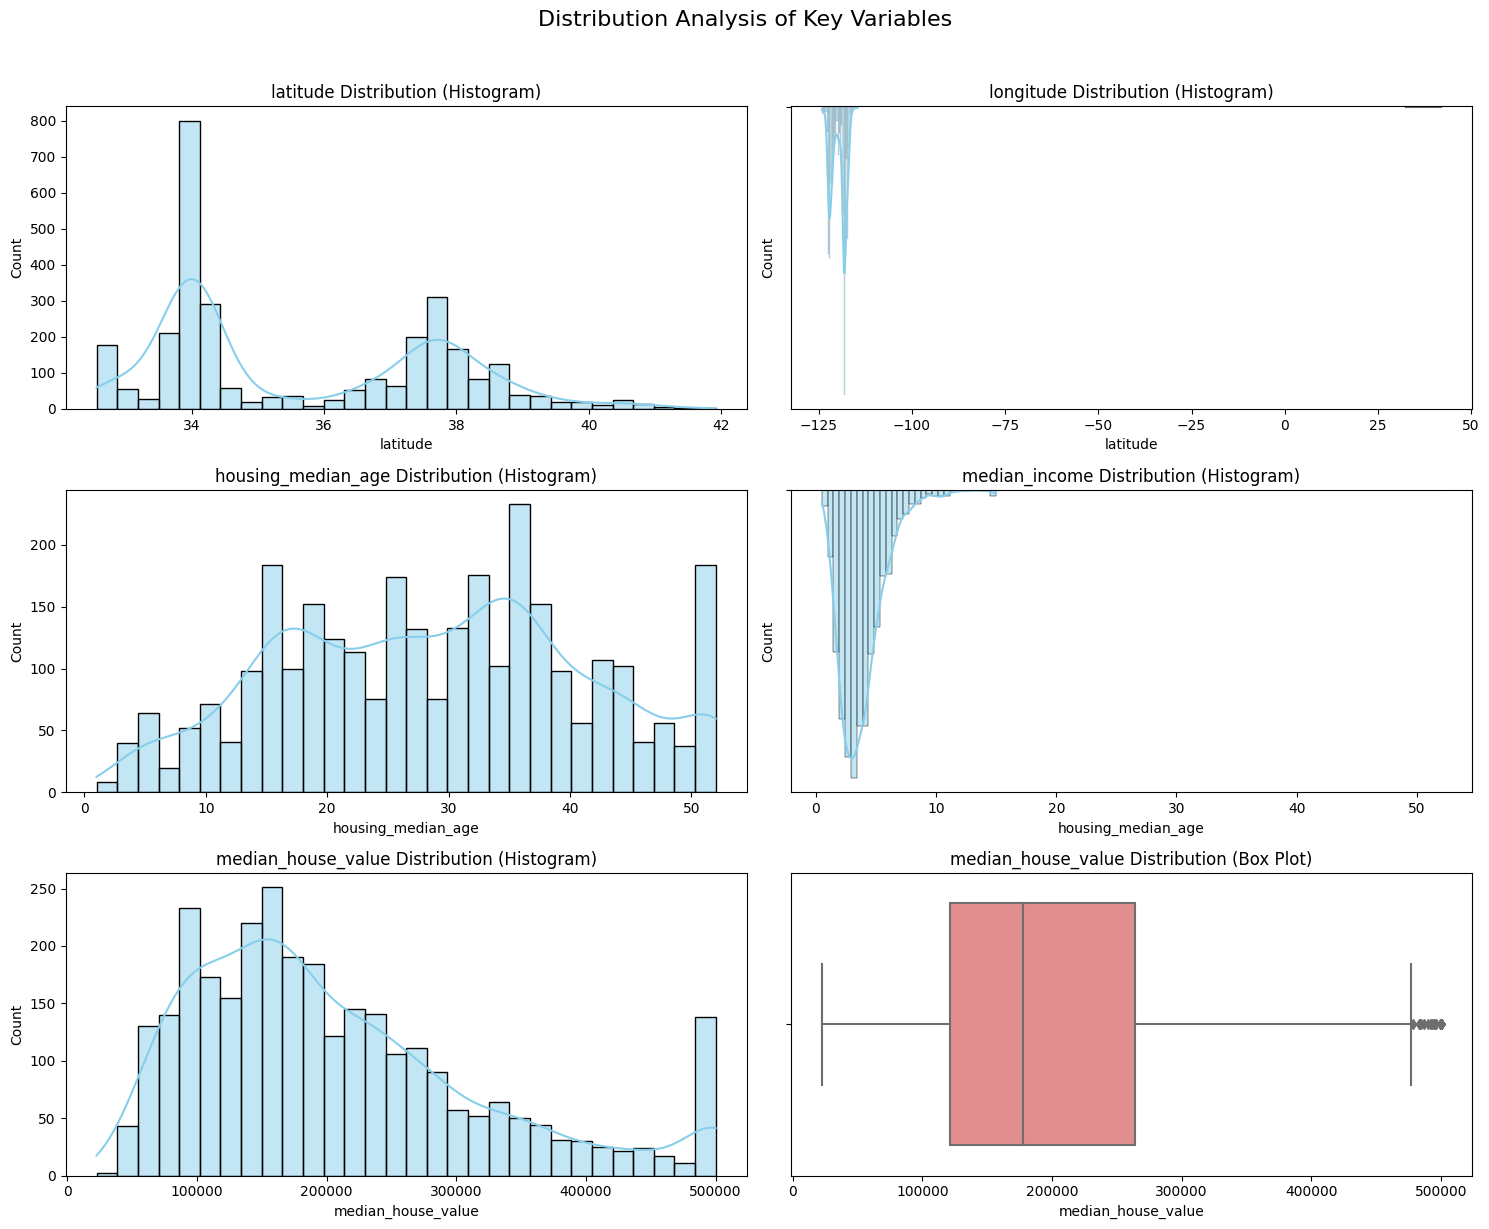

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting key variables for distribution analysis
selected_variables = ['latitude', 'longitude', 'housing_median_age', 'median_income', 'median_house_value']

# Set up subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
fig.suptitle('Distribution Analysis of Key Variables', y=1.02, fontsize=16)

# Generate histograms and box plots
for i, variable in enumerate(selected_variables):
    row, col = divmod(i, 2)

    # Histogram
    sns.histplot(df_california[variable], bins=30, kde=True, ax=axes[row, col], color='skyblue')
    axes[row, col].set_title(f'{variable} Distribution (Histogram)')

    # Box Plot
    if col + 1 < 2:  # Added a check to avoid going out of bounds for col + 1
        sns.boxplot(x=variable, data=df_california, ax=axes[row, col + 1], color='lightcoral')
        axes[row, col + 1].set_title(f'{variable} Distribution (Box Plot)')

# Adjust layout
plt.tight_layout()
plt.show()


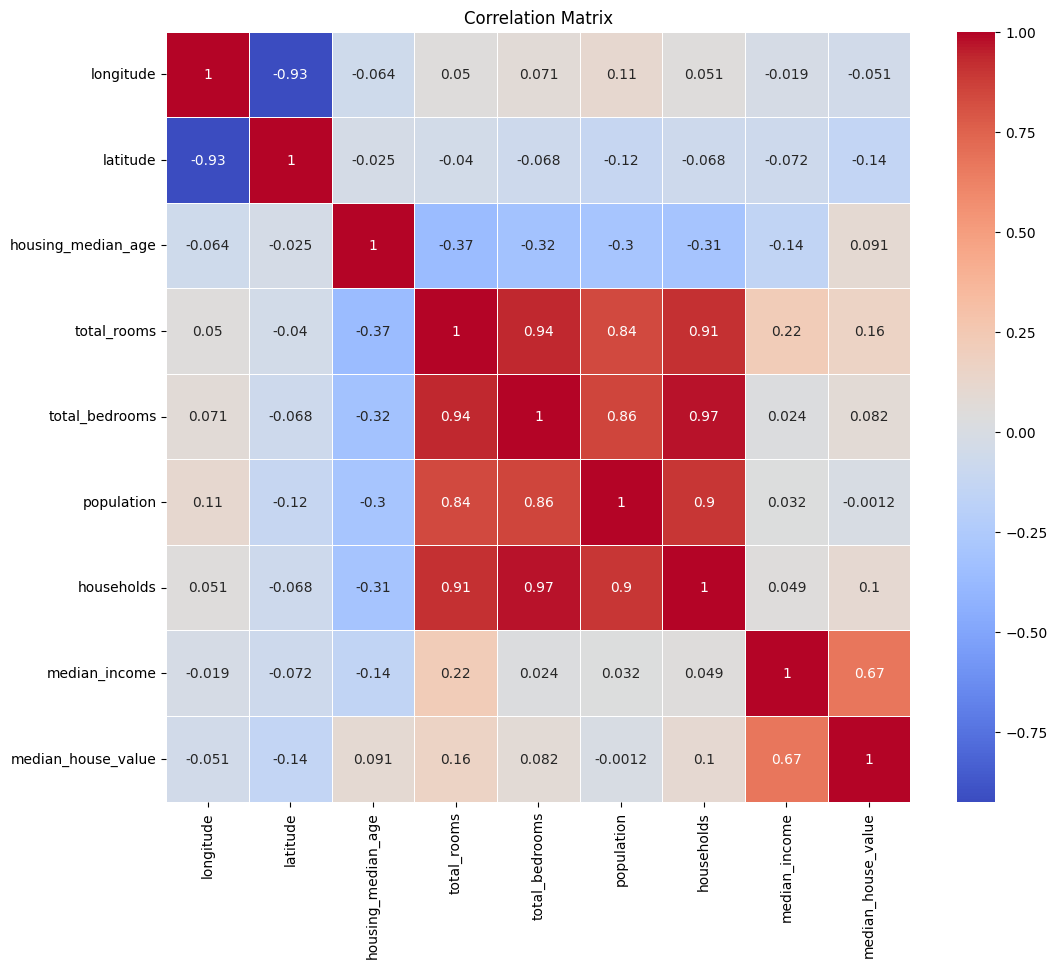

In [ ]:
# Calculate the correlation matrix
correlation_matrix = df_california.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))
plt.title('Correlation Matrix')

# Create a heatmap using Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Display the heatmap
plt.show()


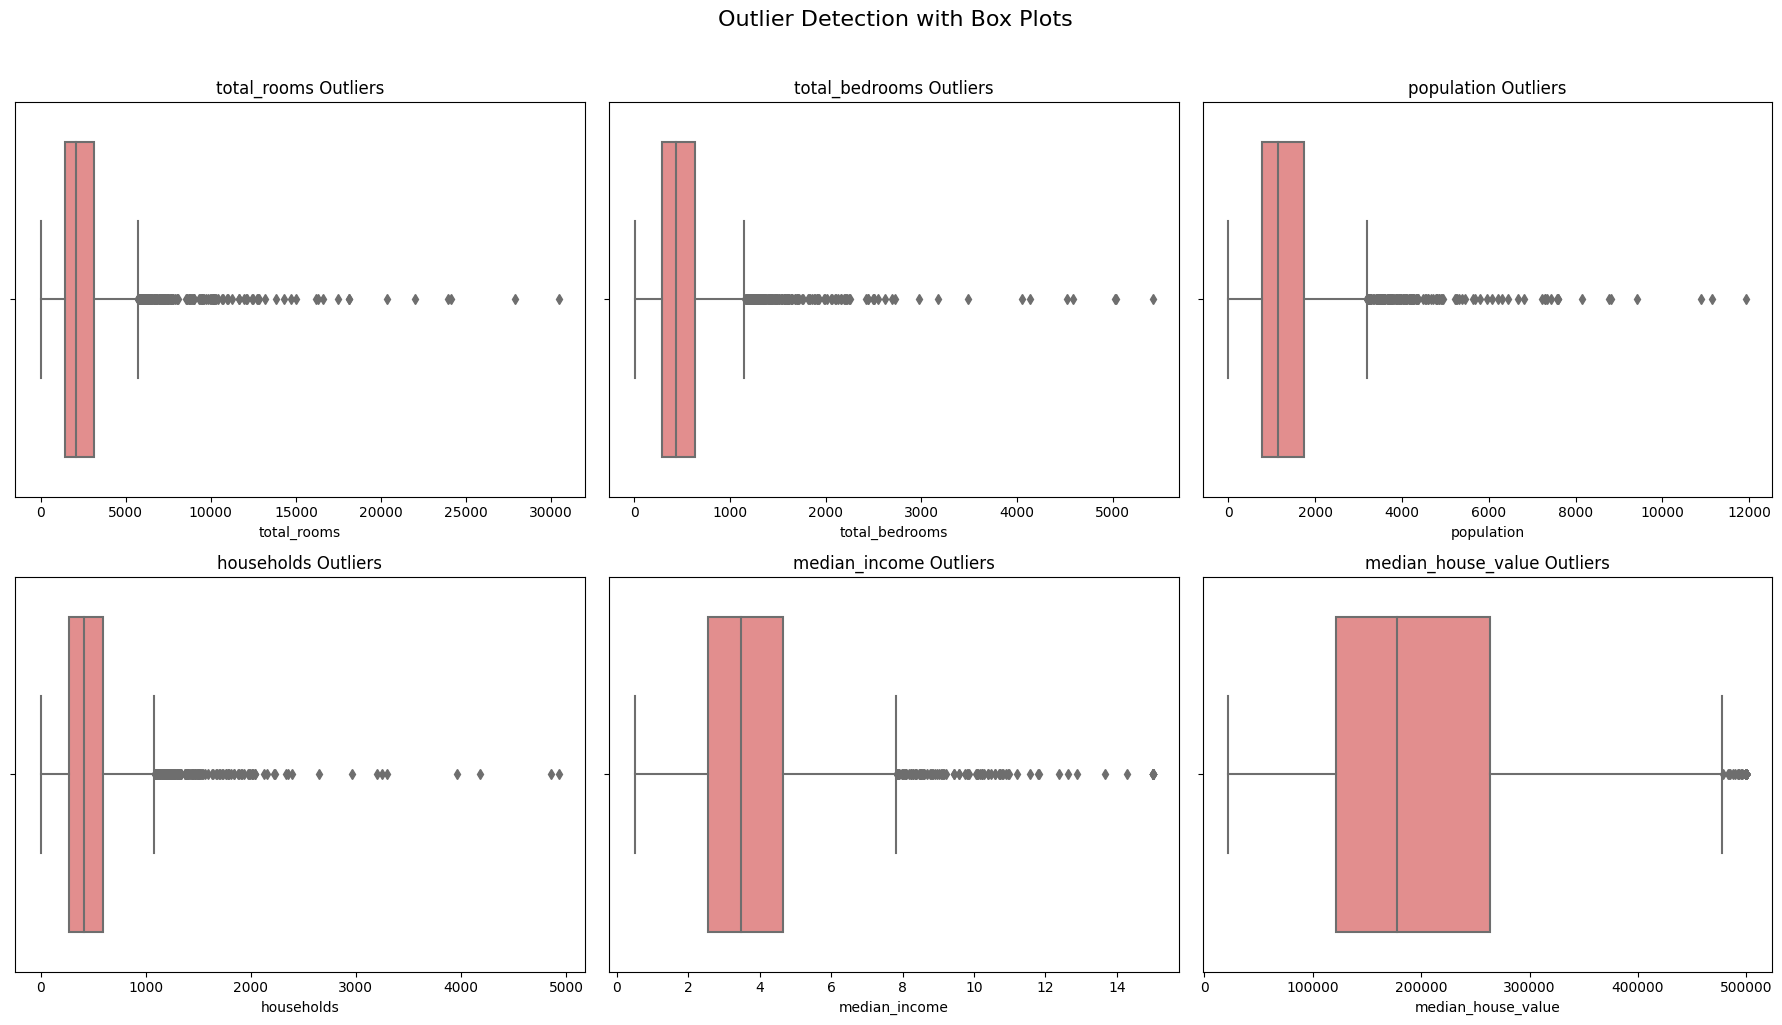

In [ ]:
# Selecting key variables for outlier detection
outlier_variables = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

# Set up subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
fig.suptitle('Outlier Detection with Box Plots', y=1.02, fontsize=16)

# Generate box plots
for i, variable in enumerate(outlier_variables):
    row, col = divmod(i, 3)

    # Box Plot
    sns.boxplot(x=variable, data=df_california, ax=axes[row, col], color='lightcoral')
    axes[row, col].set_title(f'{variable} Outliers')

# Adjust layout
plt.tight_layout()
plt.show()